Let $v_0=const$, then
$$
\omega^2v + 2i\omega\frac{dv}{dz} + (1-v_0^2)\frac{d^2v}{dz^2} = 0
$$

If we set Dirichlet boundary conditions $v(-1) = v(1) = 0$, we have

$$
v = \exp\left(-\frac{i\omega}{v_0+1}\right)\left[ \exp\left(i\omega\frac{z+1}{v_0+1}\right) - \exp\left(i\omega\frac{z+1}{v_0-1}\right) \right]
$$
where $\omega = n\pi(1-v_0^2)/2\in\mathbb{R}$

We can also set free right end $v(-1)=0, v'(1) = 0$
$$
v = \exp\left(-\frac{i\omega}{v_0+1}\right)\left[ \exp\left(i\omega\frac{z+1}{v_0+1}\right) - \exp\left(i\omega\frac{z+1}{v_0-1}\right) \right]
$$
If $v_0 > 1$, we have
$$
\omega = (v_0^2-1) \left[ \frac{n\pi}{2} + \frac{1}{4}\cos^{-1}\left(\frac{v_0-1}{v_0+1}\right) \right] \in\mathbb{R}
$$
If $v_0 < 1$, the $\arccos$ is complex and we have we have
$$
\omega = (1-v_0^2) \left[ \frac{n\pi}{2} + \frac{1}{4}\cos^{-1}\left(\frac{v_0+1}{v_0-1}\right) \right] \in\mathbb{C}
$$
Fortunately, the $\Im(\omega)<0$ when $v_0<1$, so it's damped oscillation.

We see that with supersonic $v_0$ both cases are stable solution.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# set mpl params
import json
with open("mpl_config.json") as fp:
    config: dict = json.load(fp)
    for k,v in config.items():
        plt.rcParams[k] = v

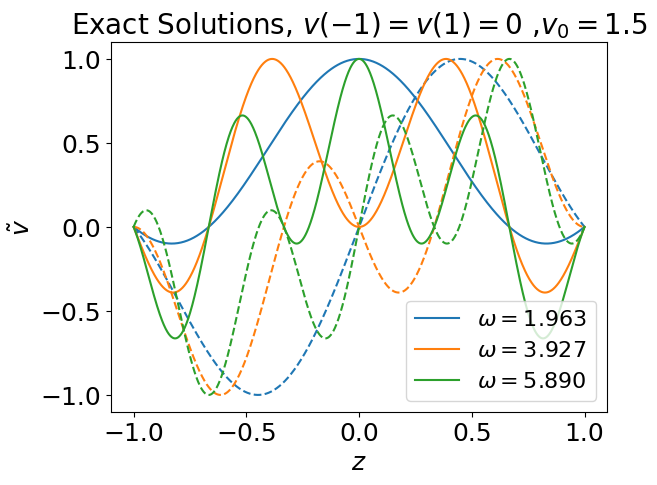

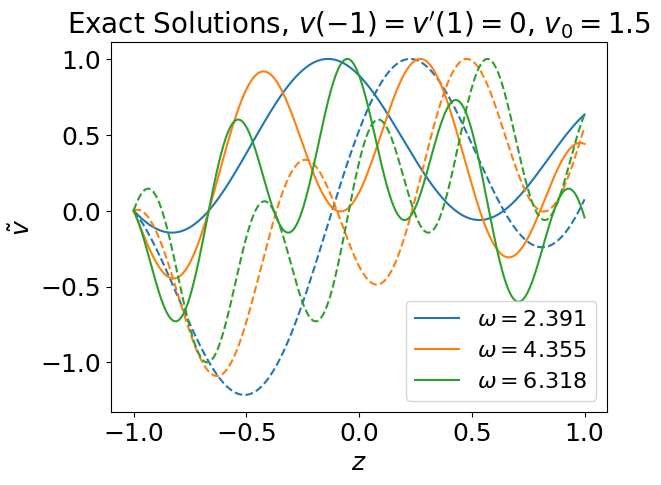

In [4]:
v0 = 1.5
N = 3

plt.figure(1)
omega = np.arange(N+1)*np.pi*np.abs(1-v0**2)/2
z = np.linspace(-1,1,1000)
for n in range(1,N+1):
    v = np.exp(-1j*omega[n]/(v0+1)) * ( np.exp(1j*omega[n]*(z+1)/(v0+1)) - np.exp(1j*omega[n]*(z+1)/(v0-1)))
    lines = plt.plot(z,v.real/v.real.max(),label=f"$\omega={omega[n]:.3f}$")
    plt.plot(z,v.imag/v.imag.max(),'--',color=lines[0]._color)
plt.xlabel("$z$")
plt.ylabel("$\\tilde{v}$")
plt.title(f"Exact Solutions, $v(-1)=v(1)=0$ ,$v_0={v0}$")
plt.legend()

plt.figure(2)
if (v0 > 1):
    omega = (v0**2-1)*(np.arange(N+1)*np.pi/2 + np.arccos((v0-1)/(v0+1))/4)
else:
    # the arccos is complex!
    omega = (1-v0**2)*(np.arange(N+1)*np.pi/2 + np.arccos((v0+1)/(v0-1)+0j)/4)
z = np.linspace(-1,1,1000)
for n in range(1,N+1):
    v = np.exp(-1j*omega[n]/(v0+1)) * ( np.exp(1j*omega[n]*(z+1)/(v0+1)) - np.exp(1j*omega[n]*(z+1)/(v0-1)))
    lines = plt.plot(z,v.real/v.real.max(),label=f"$\omega={omega[n]:.3f}$")
    plt.plot(z,v.imag/v.imag.max(),'--',color=lines[0]._color)
plt.xlabel("$z$")
plt.ylabel("$\\tilde{v}$")
plt.title(f"Exact Solutions, $v(-1)=v'(1)=0$, $v_0={v0}$")
plt.legend()


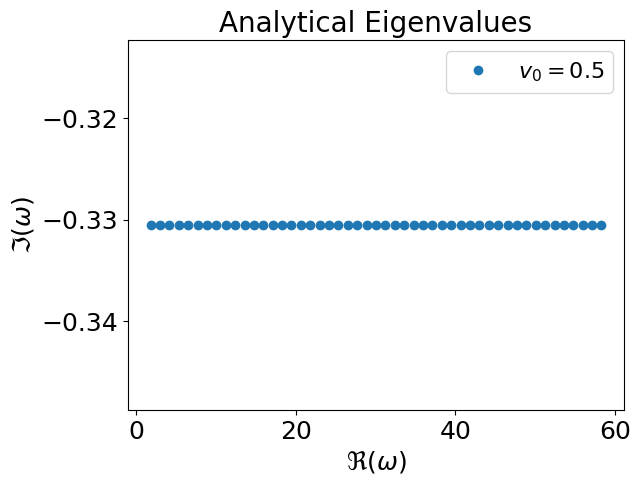

In [17]:
n = np.arange(1,50)
v0_range = [0.5] #[0.1,0.5,1.1,1.5]
for v0 in v0_range:
    if (v0 > 1):
        omega = (v0**2-1)*(n*np.pi/2 + np.arccos((v0-1)/(v0+1))/4)
    else:
        # the arccos is complex!
        omega = (1-v0**2)*(n*np.pi/2 + np.arccos((v0+1)/(v0-1)+0j)/4)
    plt.plot(omega.real, omega.imag, 'o', label=f"$v_0={v0}$")
plt.title("Analytical Eigenvalues")
plt.xlabel("$\Re(\omega)$")
plt.ylabel("$\Im(\omega)$")
plt.legend()

Text(0, 0.5, '$\\Im(\\omega)$')

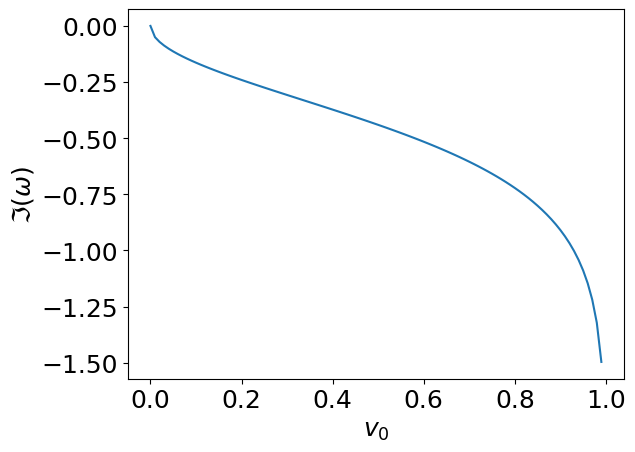

In [14]:
v0 = np.linspace(0,0.99, 100)
plt.plot(v0, np.arccos((v0+1)/(v0-1)+0j).imag/4)
plt.xlabel("$v_0$")
plt.ylabel("$\Im(\omega)$")